In [37]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
from scipy.stats import chisquare
import scipy
import pandas as pd

pl.rcParams['figure.figsize'] = (16, 5)
pl.rc('xtick', labelsize=16)
pl.rc('ytick', labelsize=16)

In [2]:
data = pd.read_csv("/home/hbueno/IFUSP/Lab 4/Exp 1/Semana2.csv", sep=",")
xdata = np.asarray(data.o)
xerro = np.asarray(data.sigma_objeto)
ydata = np.asarray(data.i)
yerro = np.asarray(data.sigma_imagem)

In [3]:
data

,o,sigma_objeto,i,sigma_imagem
0,29.52,0.05,82.93,0.05
1,25.49,0.05,86.95,0.05
2,20.51,0.05,93.00,0.05
3,15.50,0.05,98.53,0.05
4,10.51,0.05,109.35,0.05
5,9.52,0.05,113.70,0.05
6,8.21,0.05,122.85,0.05
7,40.48,0.05,78.90,0.05
8,38.87,0.05,78.80,0.05
9,37.55,0.05,80.25,0.05


In [27]:
#Modelos
def linear_fit(x, m, b):
    return m*x + b
def hiperbolic_fit(x, a, b):
    return a/x + b
def chi2(obs, esp, erro):
    return np.sum((obs-esp)**2/erro**2)
def chi2red(obs, esp, erro):
    return np.sum((obs-esp)**2/erro**2)/(len(obs)-len(ans))
def residuo(obs, esp):
    return obs - esp

In [23]:
fit=curve_fit(hiperbolic_fit, xdata, ydata, sigma=yerro, absolute_sigma=True)
ans, cov = fit
print(ans, '\n\n', np.sqrt(np.diag(cov)))

[432.42046127  69.23869306] 

 [1.20251082 0.07966891]


In [6]:
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(ydata)    # number of data points
p = len(ans) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 

for i, p,var in zip(range(n), ans, np.diag(cov)):
    sigma = var**0.5
    print ('p{0}: {1} [{2}  {3}]'.format(i, p,
                                  p - sigma*tval,
                                  p + sigma*tval))

p0: 432.42046127483775 [431.7985654828433  433.0423570668322]
p1: 69.2386930633691 [69.19749113736387  69.27989498937433]


In [24]:
chi2red(ydata, hiperbolic_fit(xdata, ans[0],ans[1]), yerro)

24.914416184700325

In [28]:
residuo(ydata, hiperbolic_fit(xdata, ans[0],ans[1]))

array([-0.95708267,  0.74698911,  2.67791048,  1.39321266, -1.03240965,
       -0.96101042,  0.94133601, -1.02101671, -1.56347982, -0.50455089,
        0.04577019, -0.12712461, -0.58650749, -0.41666643,  0.23046999,
        0.19726484,  1.48515263,  0.24396062,  0.01759035, -0.71855581,
        0.37517684,  0.31531331,  0.80797778, -1.07022249, -0.51949784])

In [51]:
x_plots = np.linspace(5,50,1000) # vetor para plotar o modelo 

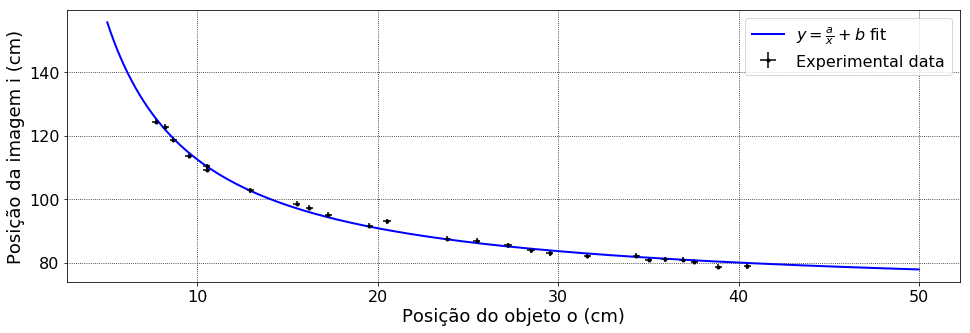

In [53]:
pl.errorbar(xdata, ydata, yerr=4*yerro, xerr=4*xerro, fmt='.',c='k',label=r'Experimental data')
pl.plot(x_plots,hiperbolic_fit(x_plots, ans[0], ans[1]),c='b',lw=2,label=r'$y=\frac{a}{x} + b$ fit')
pl.xlabel(r'Posição do objeto o (cm)', fontsize=18)
pl.ylabel(r'Posição da imagem i (cm)', fontsize=18)
pl.legend(loc="upper right",fontsize = 16)
pl.grid(ls=':',c='k')
pl.savefig('Semana 2 - Composição de lentes.png')

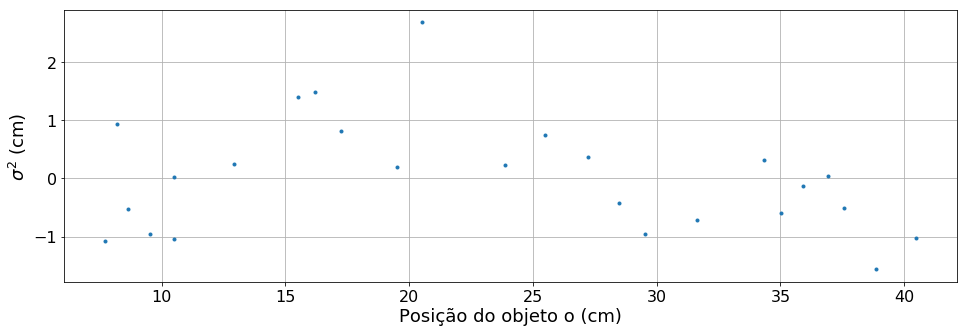

In [70]:
pl.errorbar(xdata, residuo(ydata, hiperbolic_fit(xdata, ans[0],ans[1])), fmt='.')
pl.xlabel(r'Posição do objeto o (cm)', fontsize=18)
pl.ylabel(r'$\sigma^2$ (cm)', fontsize=18)
pl.grid()

In [ ]:
# Exportando para csv para jogar no moodle:
data = {'X':xdata, 'erro X':x_erro}
df = pd.DataFrame(data, columns=['X', 'erro X'])
df.to_csv('Export_to_moodle.csv')

In [38]:
crit = scipy.stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = len(ydata)-len(ans))   # Df = number of variable categories - 1
crit

35.17246162690806

In [33]:
o =xdata
i = ydata
fd = -10.0
fc = 20.0
d=19.0

In [44]:
for k in range(len(i)):
    print(np.matrix([[1,i[k]],[0,1]]) * np.matrix([[1,0],[-1/fd,1]]) * np.matrix([[1,d],[0,1]]) * np.matrix([[1,0],[-1/fc,1]]) * np.matrix([[1,o[k]],[0,1]]))
    print('\n')

[[-3.68185000e+00  1.50808788e+02]
 [-4.50000000e-02  1.57160000e+00]]


[[-3.86275000e+00  1.72693502e+02]
 [-4.50000000e-02  1.75295000e+00]]


[[-4.1350000e+00  2.0389115e+02]
 [-4.5000000e-02  1.9770500e+00]]


[[-4.38385000e+00  2.36787325e+02]
 [-4.50000000e-02  2.20250000e+00]]


[[-4.87075000e+00  2.84923418e+02]
 [-4.50000000e-02  2.42705000e+00]]


[[-5.0665000e+00  3.0049692e+02]
 [-4.5000000e-02  2.4716000e+00]]


[[-5.47825000e+00  3.30288567e+02]
 [-4.50000000e-02  2.53055000e+00]]


[[-3.5005000e+00  1.0610976e+02]
 [-4.5000000e-02  1.0784000e+00]]


[[-3.4960000e+00  1.1163048e+02]
 [-4.5000000e-02  1.1508500e+00]]


[[-3.56125000e+00  1.18000063e+02]
 [-4.50000000e-02  1.21025000e+00]]


[[-3.5950000e+00  1.2120855e+02]
 [-4.5000000e-02  1.2390500e+00]]


[[-3.6017500e+00  1.2496014e+02]
 [-4.5000000e-02  1.2836000e+00]]


[[-3.595000e+00  1.280031e+02]
 [-4.500000e-02  1.324100e+00]]


[[-3.730000e+00  1.563323e+02]
 [-4.500000e-02  1.617950e+00]]


[[-3.892000e+00  1